In [ ]:
# Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
df = pd.read_csv('/datasets/df_songs.csv')

*Mode: True = Major Scale / False = Minor Scale*

In [70]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.617978,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,pop,0.559504,0.839056,0.665871,True,0.056664,0.097127,0.000000,0.063256,0.518,0.477903,0.240945,0.953133
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,0.629213,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),pop,0.527076,0.664225,0.507233,True,0.036621,0.069899,0.004201,0.305276,0.693,0.334085,0.182352,0.953133
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,0.662921,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),pop,0.455625,0.866761,0.608407,False,0.071576,0.076405,0.000023,0.104360,0.613,0.490757,0.208316,0.953133
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.550562,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,pop,0.515524,0.864900,0.584556,True,0.097127,0.028296,0.000009,0.185649,0.277,0.477382,0.194464,0.953133
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.651685,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),pop,0.422500,0.693889,0.525833,True,0.035271,0.077239,0.000000,0.080012,0.725,0.490549,0.230801,0.953133


In [71]:
df.describe()

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000
mean,0.411510,0.451754,0.513626,0.421495,0.098426,0.152717,0.065676,0.165481,0.509312,0.469421,0.285104,0.720546
std,0.197534,0.181832,0.236740,0.141470,0.085541,0.171373,0.167241,0.115768,0.232680,0.173978,0.094592,0.291073
min,0.000000,0.005944,0.000139,0.000000,0.022153,0.000001,0.000000,0.009316,0.000010,0.000000,0.000000,0.000000
25%,0.269663,0.318096,0.328329,0.329304,0.040086,0.015972,0.000000,0.088652,0.329000,0.334020,0.224866,0.562326
50%,0.415730,0.452929,0.512656,0.431469,0.060530,0.082317,0.000016,0.118672,0.510000,0.477115,0.274422,0.863838
75%,0.561798,0.580644,0.698896,0.522671,0.124869,0.240590,0.004798,0.217528,0.691000,0.558260,0.335173,0.953133
max,1.000000,0.966289,1.000000,1.000000,0.651283,0.689139,0.690143,0.691145,0.991000,1.000000,0.693147,1.000000


**Duda:** ¿podría haber un problema con el escalado de year al introducir nuevos datos?

# Training

In [ ]:
# Se decidió descartar 'mode ya que, al ser incluida en el dataset, las predicciones siempre coinciden con el "mode" original (Mayor o menor). Pero los oyentes no escuchan exclusivamente música de un modo, sino que consumen ambos modos de forma indistinta.
df.drop(columns=['mode'],inplace=True)

In [ ]:
# Selecting relevant audio features
features = ['track_popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'year']
# ¿incluir track popularity?
# ¿¿ Eliminación 'acousticness' por alta correlación con 'energy' y 'loudness' ??
# Reintroducir feature: mode

X = df[features].values

In [74]:
X = X.astype('float32')

In [75]:
# Splitting the data
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

In [76]:
model = Sequential([
    Input(shape=(len(features),)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu', name="embedding_layer"), # Embedding layer
    Dense(16, activation='relu'),
    Dense(len(features), activation='linear') # Output layer for reconstruction
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

¿Probar 10/20 epochs?

In [ ]:
# Entrenamiento del modelo y guardar el historial
history = model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0465 - val_loss: 0.0045
Epoch 2/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - val_loss: 0.0028
Epoch 3/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0074 - val_loss: 0.0025
Epoch 4/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0066 - val_loss: 0.0022
Epoch 5/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 6/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 7/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056 - val_loss: 0.0018
Epoch 8/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054 - val_loss: 0.0019
Epoch 9/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 10/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 11/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 12/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

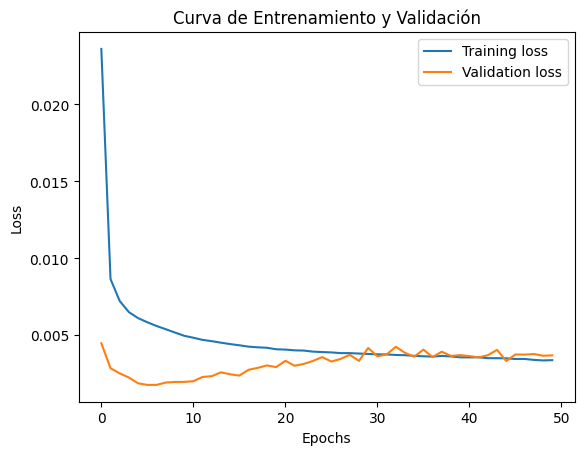

In [ ]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Curva de Entrenamiento y Validación')
plt.show()

In [ ]:
# Define model with the functional API
input_layer = Input(shape=(len(features),))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.3)(x)
embedding_layer = Dense(64, activation='relu', name="embedding_layer")(x)  # Named embedding layer
x = Dropout(0.3)(embedding_layer)
x = Dense(32, activation='relu')(x)
output_layer = Dense(len(features), activation='linear')(x)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Initialize the model by running a sample input through it
sample_input = np.random.rand(1, len(features))  # Sample input
_ = model.predict(sample_input)  # Initialize the model

# Extract embeddings using the embedding layer directly
embedding_model = Model(inputs=model.input, outputs=model.get_layer("embedding_layer").output)
song_embeddings = embedding_model.predict(X)

print("Embeddings shape:", song_embeddings.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Embeddings shape: (23081, 64)


In [ ]:
"""
# Para nuevas caciones exsternas al dataset
new_song_embedding = embedding_model.predict(new_song_features)
"""

In [79]:
# Exportación del modelo
embedding_model.save("/kaggle/working/songs_embeddings.h5")

### Búsqueda por género

In [ ]:
# Índices para facilitar la búsqueda por género
genres = ['pop', # 0
          'rock', # 1
          'rap', # 2
          'r&b', # 3
          'edm', # 4
          'latin'] # 5

df[df['playlist_genre'] == genres[1]]  # Selecciona sólo un género
#df[df['playlist_genre'] != genres[1]]  # Todos los demás géneros

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
8965,3YBZIN3rekqsKxbJc9FZko,Paradise City,Guns N' Roses,0.752809,3I9Z1nDCL4E0cP62flcbI5,Appetite For Destruction,rock,0.074529,0.906304,0.306869,0.080750,0.016759,0.011138,0.132781,0.475,0.336021,0.558120,0.107980
8966,5tqSUxm3Wpql0dlLMrIAp1,Shadow Of Your Love,Guns N' Roses,0.528090,6AK5hiec0u0guq19bKlSMm,Shadow Of Your Love,rock,0.173056,0.990025,0.482463,0.112435,0.000164,0.086361,0.292670,0.330,0.412578,0.224562,0.907753
8967,63HA3dpnOmdDcazJ9sDfrh,It's So Easy,Guns N' Roses,0.550562,3I9Z1nDCL4E0cP62flcbI5,Appetite For Destruction,rock,0.140625,0.946729,0.251452,0.120446,0.013311,0.000010,0.090480,0.218,0.664324,0.252569,0.107980
8968,2vNw57KPaYDzkyPxXYUORX,Nightrain,Guns N' Roses,0.561798,3I9Z1nDCL4E0cP62flcbI5,Appetite For Destruction,rock,0.160000,0.984064,0.391913,0.069992,0.101654,0.011237,0.164667,0.243,0.656333,0.359974,0.107980
8969,4DnEyHNO8MdhFYFrDq73BV,Mr. Brownstone,Guns N' Roses,0.539326,3I9Z1nDCL4E0cP62flcbI5,Appetite For Destruction,rock,0.237169,0.883600,0.284339,0.037681,0.025083,0.000002,0.266203,0.576,0.373977,0.294280,0.107980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12402,2l9U0zTBpcsAfCuIUO9FxB,Stand Up,Trapt,0.359551,0qQdyD6M7fZ35zUdqiguTV,Someone In Control,rock,0.121801,0.929296,0.535077,0.093399,0.000525,0.000004,0.179818,0.360,0.738645,0.317870,0.442285
12403,3CkjLJYnnyOtGk4Jx4iYS4,Woman,Wolfmother,0.573034,5ywynDHLHT3l8QSu41TcmC,Wolfmother,rock,0.047961,0.906304,0.595300,0.162119,0.000051,0.094310,0.145830,0.172,0.418261,0.207751,0.470508
12404,1lATXTBJDHwawvT1UfxWu3,The Pot,TOOL,0.629213,1fvWYcbjuycyHpzNPH1Vfk,"10,000 Days",rock,0.219961,0.624100,0.397462,0.038355,0.000148,0.316270,0.248421,0.466,0.382828,0.527107,0.470508
12405,55mJleti2WfWEFNFcBduhc,Schism,TOOL,0.640449,5l5m1hnH4punS1GQXgEi3T,Lateralus,rock,0.321489,0.509796,0.318068,0.029753,0.001199,0.350657,0.170586,0.191,0.382750,0.555400,0.340672


### Búsqueda por artista/canción

In [81]:
# Búsqueda por artista/nombre
df.loc[df['track_artist'] == 'Daft Punk']
#df.loc[df['track_name'] == 'Yesterday']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
559,5CMjjywI0eZMixPeqNd75R,Lose Yourself to Dance,Daft Punk,0.674157,4m2880jivSbbyEGAKfITCa,Random Access Memories,pop,0.692224,0.434281,0.350094,False,0.055435,0.080566,0.001139,0.072600,0.674,0.335330,0.489098,0.702332
574,2Foc5Q5nqNiosCNqttzHof,Get Lucky (feat. Pharrell Williams & Nile Rodg...,Daft Punk,0.730337,2ePFIvZKMe8zefATp9ofFA,Get Lucky (feat. Pharrell Williams & Nile Rodg...,pop,0.630436,0.657721,0.297928,False,0.037296,0.041718,0.000001,0.096219,0.862,0.438866,0.331672,0.702332
1155,2cGxRwrMyEAp8dEbuZaVv6,Instant Crush,Daft Punk,0.719101,4m2880jivSbbyEGAKfITCa,Random Access Memories,pop,0.600625,0.342225,0.274691,False,0.026739,0.041334,0.481809,0.074179,0.518,0.399072,0.466285,0.702332
2333,0DiWol3AO6WpXZgp0goxAV,One More Time,Daft Punk,0.707865,2noRn2Aes5aoNVsU6iWThc,Discovery,pop,0.373321,0.485809,0.313287,True,0.124869,0.019116,0.000000,0.286682,0.476,0.482570,0.441681,0.340672
2570,2LD2gT7gwAurzdQDQtILds,Veridis Quo,Daft Punk,0.573034,2noRn2Aes5aoNVsU6iWThc,Discovery,pop,0.364816,0.471969,0.130303,False,0.044017,0.391366,0.667829,0.098940,0.119,0.379217,0.477003,0.340672
2571,1pKYYY0dkg23sQQXi0Q5zN,Around the World,Daft Punk,0.662921,5uRdvUR7xCnHmUW8n64n9y,Homework,pop,0.913936,0.632025,0.486364,True,0.139762,0.003554,0.636048,0.086728,0.841,0.473067,0.588449,0.255952
2572,69kOkLUCkxIZYexIgSG8rq,Get Lucky,Daft Punk,0.696629,4m2880jivSbbyEGAKfITCa,Random Access Memories,pop,0.656100,0.628849,0.279321,False,0.039509,0.037103,0.000002,0.069526,0.863,0.438879,0.510593,0.702332
2578,3H3cOQ6LBLSvmcaV7QkZEu,Aerodynamic,Daft Punk,0.539326,2noRn2Aes5aoNVsU6iWThc,Discovery,pop,0.389376,0.829921,0.367083,True,0.051073,0.283674,0.621114,0.070179,0.135,0.483548,0.271950,0.340672
2579,2VEZx7NWsZ1D0eJ4uv5Fym,Digital Love,Daft Punk,0.595506,2noRn2Aes5aoNVsU6iWThc,Discovery,pop,0.414736,0.440896,0.323264,True,0.032758,0.046979,0.621651,0.294161,0.530,0.495437,0.413807,0.340672
2580,5W3cjX2J3tjhG8zb6u0qHn,"Harder, Better, Faster, Stronger",Daft Punk,0.662921,2noRn2Aes5aoNVsU6iWThc,Discovery,pop,0.667489,0.512656,0.300889,False,0.134531,0.041814,0.002627,0.306013,0.692,0.487283,0.292577,0.340672


### Búsqueda por ID

Ejemplos de testing:
- 3gu0fRSgFuc4FmrtIv0DnC (Reggaeton)
- 0r7CVbZTWZgbTCYdfa2P31 (pop)
- 5yY9lUy8nbvjM1Uyo1Uqoc (rap)

In [82]:
# Búsqueda por ID
id_ = "5CMjjywI0eZMixPeqNd75R"
name = df.loc[df['track_id'] == id_]
song_index = df[df['track_id'] == id_].index.item()
print(name.iloc[0]['track_name'], 'by', name.iloc[0]['track_artist'], 'on album', name.iloc[0]['track_album_name'])
#print(song_index)
print()
df.iloc[song_index]

Lose Yourself to Dance by Daft Punk on album Random Access Memories



track_id            5CMjjywI0eZMixPeqNd75R
track_name          Lose Yourself to Dance
track_artist                     Daft Punk
track_popularity                  0.674157
track_album_id      4m2880jivSbbyEGAKfITCa
track_album_name    Random Access Memories
playlist_genre                         pop
danceability                      0.692224
energy                            0.434281
loudness                          0.350094
mode                                 False
speechiness                       0.055435
acousticness                      0.080566
instrumentalness                  0.001139
liveness                            0.0726
valence                              0.674
tempo                              0.33533
duration_ms                       0.489098
year                              0.702332
Name: 559, dtype: object

In [83]:
# Búsqueda por index
#song_index = 12616  # For example, the first song in the dataset
"""
name = df.loc[df['track_id'] == df.iloc[song_index]['track_id']]
print(name.iloc[0]['track_name'], 'by', name.iloc[0]['track_artist'], 'on album', name.iloc[0]['track_album_name'])
print()

df.iloc[song_index]
"""

"\nname = df.loc[df['track_id'] == df.iloc[song_index]['track_id']]\nprint(name.iloc[0]['track_name'], 'by', name.iloc[0]['track_artist'], 'on album', name.iloc[0]['track_album_name'])\nprint()\n\ndf.iloc[song_index]\n"

## Predicción

In [ ]:
num_pred = 5 # Modificar a gusto para obtener más predicciones
similarities = cosine_similarity([song_embeddings[song_index]], song_embeddings)[0]

# Get top n most similar songs (excluding itself)
similar_indices = np.argsort(similarities)[-(num_pred+1):-1][::-1]
similar_songs = df.iloc[similar_indices]

for i, song in enumerate(similar_songs.index):
    print(f"""{i+1}º) "{similar_songs.loc[song, 'track_name']}" by {similar_songs.loc[song, 'track_artist']} on album "{similar_songs.loc[song, 'track_album_name']}" ({similar_songs.loc[song, 'playlist_genre'].title()})\n""")

1º) "Hola Beba" by Farruko on album "Hola Beba" (Latin)

2º) "105 F Remix" by KEVVO on album "105 F Remix" (Latin)

3º) "Aparentemente" by Yaga & Mackie on album "La Reunion" (Latin)

4º) "Smile" by Scarface on album "Greatest Hits" (Rap)

5º) "Yo No Soy Tu Marido" by Nicky Jam on album "Reggaeton Diamond Collection" (Latin)



In [88]:
similar_songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
14806,1yBD8MNoNJGajzB5X83p9Z,Hola Beba,Farruko,0.516854,2P1I1irRcW34ZTr6TghnYY,Hola Beba,latin,0.558009,0.278784,0.329304,False,0.051358,0.094401,0.000000,0.081119,0.603,0.249296,0.278403,0.595396
15141,1aUGxXCz9QimNkKeiJtzZ7,105 F Remix,KEVVO,0.786517,2801cwQRE2bAQ6pKTrI13w,105 F Remix,latin,0.810000,0.568516,0.390820,False,0.144966,0.313350,0.000003,0.251537,0.741,0.334561,0.630881,0.953133
14480,5RCcvZz5i0rckjbCTSPL1s,Aparentemente,Yaga & Mackie,0.573034,7tZ6A3h843NyVgqtOD4e8Q,La Reunion,latin,0.739600,0.488601,0.422916,False,0.092944,0.079458,0.001968,0.231112,0.871,0.295106,0.417033,0.780301
6226,2wxO3ZydJTZRi4Bbc02q7i,Smile,Scarface,0.550562,5wmfZWzWjS1UARhcZSirf4,Greatest Hits,rap,0.490000,0.161604,0.258020,False,0.245296,0.048600,0.000001,0.148420,0.499,0.190026,0.412656,0.595396
14485,10bbgurV9w05vJVGAX9jYq,Yo No Soy Tu Marido,Nicky Jam,0.550562,3HD7DUUJXbxVd8q6Vujpri,Reggaeton Diamond Collection,latin,0.651249,0.413449,0.373858,False,0.050883,0.068313,0.000056,0.082962,0.821,0.301566,0.249078,0.562326


## Análisis de resultados

In [ ]:
# 0. Canción original (user input)
song = df.iloc[song_index].copy()
song = song.drop(index=['track_id','track_name','track_artist','playlist_genre',
                       'track_album_id','track_album_name'])
song = song.astype(float)

# 0. Calcular la media de las características en el dataframe completo
df_mean = df[features].mean()

# 1. Filtrar las canciones similares usando los índices y calcular la media
similar_mean = similar_songs[features].mean()

# 2. Crear un DataFrame que contenga ambas medias para fácil comparación
comparison_df = pd.DataFrame({'Original song': song, 'Similar songs': similar_mean})

# 3. Calcular el RMSE entre la canción original y la media de las canciones similares
comparison_df['Similarity (RMSE)'] = np.sqrt((comparison_df['Original song'] - comparison_df['Similar songs']) ** 2)
comparison_df['Other songs'] = df_mean

# 4. Calcular el RMSE entre la media de canciones similares y la media general
comparison_df['Difference (RMSE)'] = np.sqrt((comparison_df['Similar songs'] - comparison_df['Other songs']) ** 2)

# 5. Compara el RMSE de la predicción contra la media del dataset (Normalizado)
comparison_df['Eficacia (%)'] =  comparison_df['Difference (RMSE)'] / (comparison_df['Similarity (RMSE)'] + comparison_df['Difference (RMSE)'])
# Valores cercanos a 1 indican una predicción excelente
# Valores cercanos a 0 indican una predicción pobre (RMSE similar entre la predicción y la media)

In [ ]:
comparison_df

,Original song,Similar songs,Similarity (RMSE),Other songs,Difference (RMSE),Eficacia (%)
track_popularity,0.426966,0.452809,0.025843,0.411510,0.041299,0.615101
danceability,0.504100,0.540228,0.036128,0.451754,0.088474,0.710055
energy,0.287296,0.400410,0.113114,0.513626,0.113216,0.500224
loudness,0.223776,0.373051,0.149275,0.421495,0.048444,0.245015
mode,1.000000,1.000000,0.000000,0.566613,0.433387,1.000000
speechiness,0.041814,0.085767,0.043953,0.098426,0.012659,0.223607
acousticness,0.150143,0.075989,0.074154,0.152717,0.076728,0.508532
instrumentalness,0.000275,0.000045,0.000230,0.065676,0.065631,0.996503
liveness,0.126633,0.121426,0.005207,0.165481,0.044055,0.894298
valence,0.919000,0.860200,0.058800,0.509312,0.350888,0.856476


**NOTAS:**
- Similarity/Diference: representan la proximidad de los datos a través del RMSE (0 es "similar" | 1 es "diferente")
- Eficacia: 1 indica una predicción excelente. 0 indica una predicción pobre.

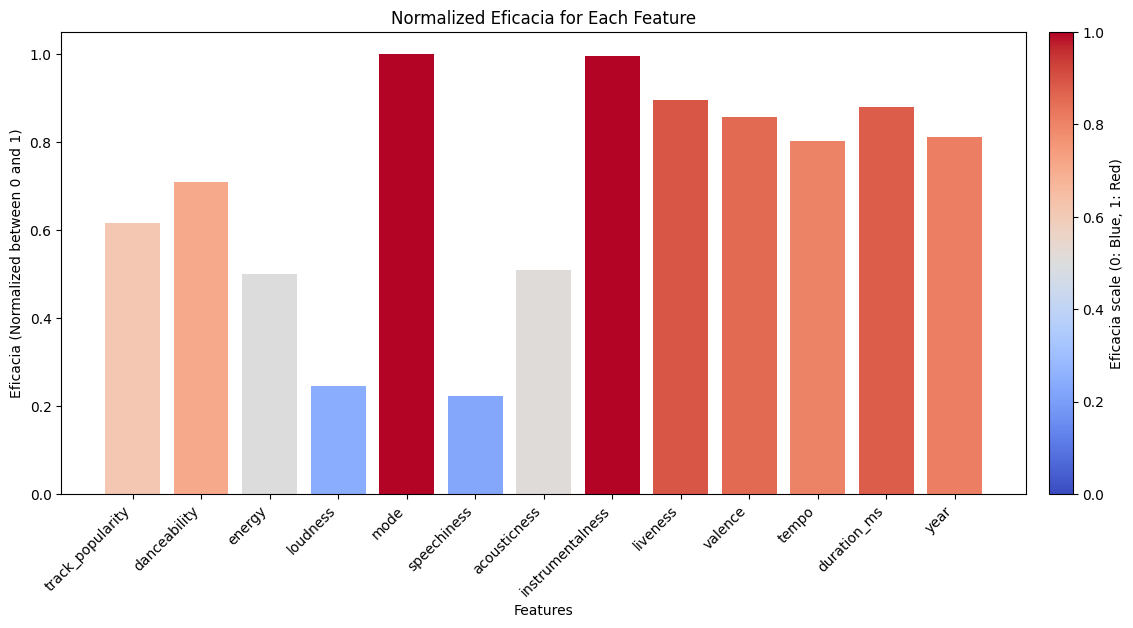

In [ ]:
# Creating an explicit axis for the colorbar to resolve the deprecation warning
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the color map from blue (near 0) to red (near 1) for Eficacia
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])  # Setting an empty array to avoid warnings

# Create the figure and plot each bar with color based on Eficacia value
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(comparison_df.index, comparison_df['Eficacia (%)'], color=sm.to_rgba(comparison_df['Eficacia (%)']))

# Customize the x-axis labels to be angled at 45 degrees and smaller font size
ax.set_xticks(comparison_df.index)
ax.set_xticklabels(features, rotation=45, ha='right', fontsize=10)

# Labels and title
ax.set_xlabel("Features")
ax.set_ylabel("Eficacia (Normalized between 0 and 1)")
ax.set_title("Normalized Eficacia for Each Feature")

# Add color bar with a specified axis
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Eficacia scale (0: Blue, 1: Red)')

plt.show()


In [ ]:
threshold = 0.6
indices = comparison_df[comparison_df['Eficacia (%)'] > threshold].index
top_features = comparison_df.loc[indices].sort_values(by="Eficacia (%)", ascending=False)
print("Eficacia de los features representativos:")
for i, (feature, row) in enumerate(top_features['Eficacia (%)'].items(), start=1):
    print(f"{i}º) {feature}: {row*100:.1f}%")
    
#print(top_features['Eficacia'])

Eficacia de los features representativos:
1º) mode: 100.0%
2º) instrumentalness: 99.7%
3º) liveness: 89.4%
4º) duration_ms: 87.9%
5º) valence: 85.6%
6º) year: 81.2%
7º) tempo: 80.2%
8º) danceability: 71.0%
9º) track_popularity: 61.5%


**Ideas:**
- Se puede ponderar el peso de ciertas features en la búsqueda (por ejemplo el año)
- Se puede incluir un feature que indique el idioma de la letra.

**Observaciones:**
- Es probable que mode no sea de utilidad. Al ser incluida en el dataset, la predicción siempre coincide con el "mode" original, pero los oyentes no escuchan exclusivamente música de un modo.
- Pareciera que la búsqueda de similitud tiende a evitar outliers.